# Data Sources
- https://njogis-newjersey.opendata.arcgis.com/
    - [Land Capacity Analysis for P.L. 2024, c.2](https://njogis-newjersey.opendata.arcgis.com/datasets/12acdfe0a5104f8f8a2f604e96063e74_0/explore)
- Affordable Housing
    - [Do Affordable Housing Projects Harm Suburban Communities?
Crime, Property Values, and Taxes in Mount Laurel, NJ](https://oar.princeton.edu/bitstream/88435/pr17n0b/1/nihms768473.pdf)
    - [NJ’s New Affordable Housing Law
Assembly Bill 4/Senate Bill 50](https://www.fairsharehousing.org/wp-content/uploads/2024/08/NJs-New-Affordable-Housing-Law_Fact-Sheet_Fair-Share-Housing-Center_July-2024.pdf)
    - [List of Affordable Developments by County](https://www.nj.gov/dca/codes/publications/developments.shtml)
    - [2025 to 2035 Affordable Housing Calculations](https://www.nj.gov/dca/dlps/4th_Round_Numbers.shtml)
    - [Affordable Housing Obligations for
2025-2035 (Fourth Round)
Methodology and Background](https://www.nj.gov/dca/dlps/pdf/FourthRoundCalculation_Methodology.pdf)
- Real Estate
    - [NJ Local Listing](https://njar-public.stats.10kresearch.com/reports)
    - [Median Income, Home Value and Residential Property Taxes in NJ Census Tracts](https://njogis-newjersey.opendata.arcgis.com/datasets/njdca::median-income-home-value-and-residential-property-taxes-in-nj-census-tracts-1/about)
- Natinonal
    - [US Census Bureau: American Community Survey](https://www.census.gov/programs-surveys/acs.html)
    - [Nearly Half of Renter Households Are Cost-Burdened, Proportions Differ by Race](https://www.census.gov/newsroom/press-releases/2024/renter-households-cost-burdened-race.html)
- Terms
    - LMI: lowand moderate-income
        - COAH (Housing) Region income limits: identified limits corresponding to low-income households as incomes of 50 percent or less of median income and limits corresponding to moderate-income households as incomes between 80 and 50 percent of the median income, with median income defined at the Housing Region level.
        - HUD defines low-income as 80 percent of Area Median Family Income and very low-income as 50 percent of Area Median Family Income.
    - A Public Use Microdata Area (PUMA) is a geographic unit used by the U.S. Census Bureau to provide detailed demographic and economic data while maintaining individual privacy.
    - Vacant land parcels refer to plots of land that have no buildings or significant structures on them. These parcels may be completely undeveloped or may have been cleared for future use.

- The lawsuit
    - https://www.dailyrecord.com/story/news/new-jersey/2025/03/12/nj-builders-group-will-sue-towns-over-affordable-housing-rule/80863644007/
    - https://thepressgroup.net/valley-towns-face-lawsuits-after-fourth-round-filings/
    - https://www.mycentraljersey.com/story/news/local/development/2025/03/03/affordable-housing-agreements-made-with-3-large-central-jersey-towns/80875827007/
    - List of the towns in lawsuit:
        - https://www.nj.com/news/2025/01/27-nj-towns-try-to-delay-new-affordable-housing-law-again.html#:~:text=The%20municipalities%20that%20signed%20on,Parsippany%2DTroy%20Hills%2C%20Wall%2C
        - https://www.florhamparknj.gov/media/Affordable%20Housing/LLRP%20Release%20101824.pdf
        - https://www.tapinto.net/towns/east-hanover-slash-florham-park/sections/government/articles/east-hanover-joins-coalition-challenging-new-jersey-s-round-4-affordable-housing-mandates
            - Montvale
            - Denville
            - Florham Park
            - Hillsdale
            - Little Falls
            - Mannington
            - Millburn
            - Montville
            - Old Tappan
            - Totowa
            - Allendale
            - Westwood
            - Hanover
            - Wyckoff
            - Wharton
            - Mendham
            - Oradell
            - Closter
            - West Amwell
            - Washington (Bergen County)
            - Norwood
            - Parsippany-Troy Hills
            - Wall
            - Holmdel
            - East Hanover
            - Cedar Grove
            - Franklin Lakes
- Data
    - [Household Income Data - S1903 ACS 2023 5Y](https://data.census.gov/table/ACSST5Y2023.S1903?q=S1903&g=040XX00US34,34$0600000_050XX00US34001$0600000_060XX00US3402532640&y=2023&d=ACS+5-Year+Estimates+Subject+Tables)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import random  # No longer needed for coloring
import numpy as np
import pandas as pd
from collections import defaultdict
import dataclasses as dcs
import abc

## GeoJson: NJ Counties and Townships

In [2]:
nj_townships = gpd.read_file("../data/NJ_Municipal_Boundaries_3424_930771950455602469.geojson")
nj_townships["GNIS"]=nj_townships["GNIS"].astype(int)


counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip")

## Utils

In [3]:
import csv
def save_csv(csv_filename:str, data: list[dict]):
    with open(csv_filename, mode="w", newline='', encoding="utf-8") as file:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)
    print(f"Done saving {len(data)} records to {csv_filename}")

## Geo Json Maps

### Gradient Interactive

In [4]:
import geopandas as gpd
import folium
import matplotlib.colors as mcolors

def nj_gradient_interactive(
    townships: gpd.GeoDataFrame,
    title: str,
    value_col_name: str = "value",
    cmap_val: str = "viridis"
):
    """Creates an interactive Folium map with hover tooltips showing township names."""

    # Define value range
    v1, v2 = townships[value_col_name].min(), townships[value_col_name].max()

    # Normalize values to range [0,1] for colormap
    norm = mcolors.Normalize(vmin=v1, vmax=v2)
    
    # Choose a colormap using the new syntax
    cmap = plt.get_cmap(cmap_val)  # Alternative: mcolors.get_cmap("viridis")

    # Assign colors based on normalized values
    townships["color"] = [mcolors.to_hex(cmap(norm(value))) for value in townships[value_col_name]]
    
    # Create a Folium map centered at NJ (adjust zoom/start position)
    m = folium.Map(location=[40.0, -74.5], zoom_start=8, tiles="cartodbpositron")

    # Add township polygons with tooltips
    for _, row in townships.iterrows():
        folium.GeoJson(
            row.geometry,
            style_function=lambda feature, color=row["color"]: {
                "fillColor": color,
                "color": "black",
                "weight": 0.5,
                "fillOpacity": 0.7
            },
            tooltip=row["NAME"]  # Show township name on hover
        ).add_to(m)
    
    return m  # Return the map object

### Gradient

In [5]:
def nj_gradient(
    townships: gpd.geodataframe.GeoDataFrame,
    title:str,
    label:str=None,
    value_col_name:str="value",
    cmap_val:str="viridis",
):
    """Show a gradient plot."""
    label = label if label else value_col_name
    # Define value range
    v1, v2 = townships[value_col_name].min(), townships[value_col_name].max()
    
    # Normalize values to range [0,1] for colormap
    norm = mcolors.Normalize(vmin=v1, vmax=v2)
    
    # Choose a colormap using the new syntax
    cmap = plt.get_cmap(cmap_val)  # Alternative: mcolors.get_cmap("viridis")
    
    # Assign colors based on normalized values
    townships["color"] = [mcolors.to_hex(cmap(norm(value))) for value in townships[value_col_name]]
    
    # Plot the townships with gradient colors
    fig, ax = plt.subplots(figsize=(10, 10))
    townships.plot(ax=ax, color=townships["color"], edgecolor="black", linewidth=0.5)
    
    # Add a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(label)
    
    # Remove axes for better visualization
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    
    plt.show()

## GeoPandas Plot Demo
### NJ Counties

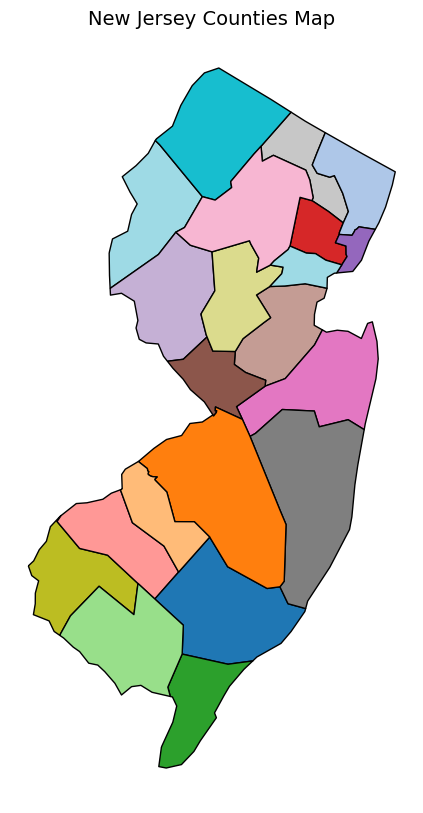

In [6]:
# Filter for New Jersey (state FIPS code for NJ is 34)
nj_counties = counties[counties["STATEFP"] == "34"]

# Plot with random colors
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties.plot(column="NAME", cmap="tab20", legend=False, edgecolor="black", ax=ax)

# Add Titles
ax.set_title("New Jersey Counties Map", fontsize=14)
ax.axis("off")  # Hide axes

plt.show()


### NJ Municipalities

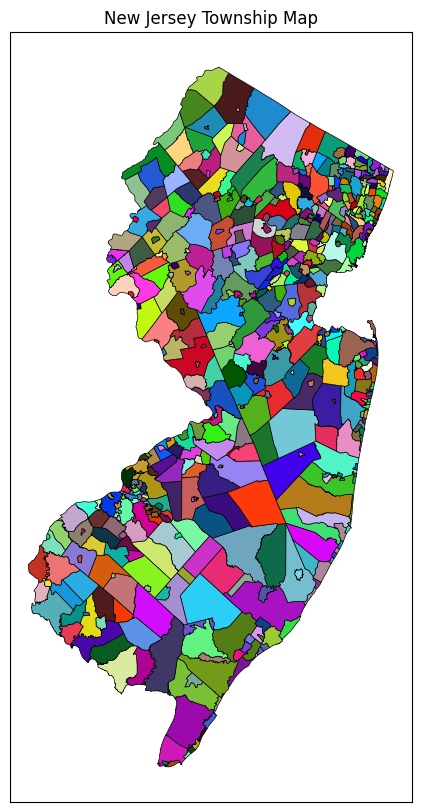

In [7]:
# Generate random colors for each township
nj_townships["color"] = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(nj_townships))]

# Plot the townships
fig, ax = plt.subplots(figsize=(10, 10))
nj_townships.plot(ax=ax, color=nj_townships["color"], edgecolor="black", linewidth=0.5)

# Remove axes for better visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("New Jersey Township Map")

plt.show()

### NJ Muni Gradient

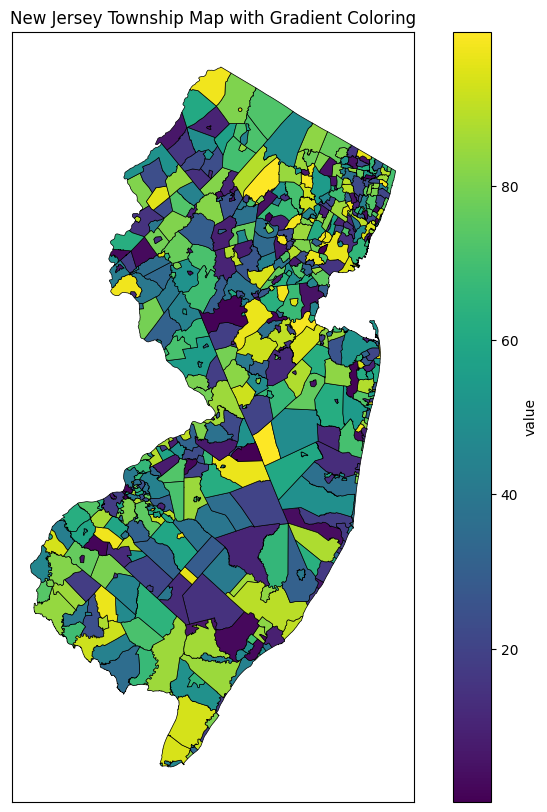

In [8]:
# Example: Assigning random values (Replace with actual data column)
nj_townships_cp = nj_townships.copy()
nj_townships_cp["value"] = np.random.uniform(0, 100, size=len(nj_townships))  # Simulated values
nj_gradient(nj_townships_cp, title="New Jersey Township Map with Gradient Coloring")

### NJ Muni Interactive

In [9]:
# Usage Example
interactive_map = nj_gradient_interactive(nj_townships_cp, title="New Jersey Township Map")
interactive_map.save("nj_townships_map.html")  # Save to an HTML file
# interactive_map  # Display in Jupyter Notebook (if applicable)

## Data
### Preprocessing State Affordable Housing Table Data

In [10]:
with open("../data/raw_affordable_housing_data.txt", "r") as f:
    content = f.read()

lines = content.split("\n")
header_line = lines[0]
towns = lines[1:]

In [11]:
parsed_data = []
for line in towns:
    tokens = line.split(" ")
    township = " ".join(tokens[:-11])
    parsed_data.append(",".join([township] + tokens[-11::]))

parsed_data = [header_line] + parsed_data

In [12]:
# with open("../data/state_affordable_housing.csv", "w") as file:
#     for line in parsed_data:
#         file.write(line)
#         file.write("\n")

### Read Preprocessed State Affordable Housing Data

In [13]:
import csv
with open("../data/state_affordable_housing.csv", newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)  # Automatically uses the first row as column names
    data = [row for row in reader]  # Convert to a list of dictionaries
for r in data:
    m = r["Municipality"]
    c = r["County"]
    match_found = False
    for i in range(len(nj_townships)):
        g = nj_townships.iloc[i]
        mun = g["MUN"]
        mun_label = g["MUN_LABEL"]
        if m.lower() in [mun.lower(), mun_label.lower()] and c.lower() == g["COUNTY"].lower():
            match_found = True
            r["GNIS"]=g["GNIS"]
    if not match_found:
        print(m)
print(data[0])

{'Municipality': 'Absecon city', 'County': 'Atlantic', 'Region': '6', 'Present Need': '39', 'Qualified Urban Aid Municipality': 'No', 'Equalized Nonresidential Valuation Factor': '0.97%', 'Land Capacity Factor': '1.11%', 'Income Capacity Factor': '1.44%', 'Average Allocation Factor': '1.17%', 'Prospective Need': '22', '1000/20% Cap': '723', 'Prospective Need with 1000/20% Cap': '22', 'GNIS': np.int64(885134)}


In [14]:
# save_csv("../data/state_affordable_housing.csv", data)

In [15]:
nj_affordable_housing = pd.read_csv("../data/state_affordable_housing.csv")

### Factors

In [16]:
FACTORS = ["Equalized Nonresidential Valuation Factor", "Land Capacity Factor", "Income Capacity Factor"]

In [17]:
for i, factor in enumerate(FACTORS):
    nj_affordable_housing[f"factor_{i+1}"]=nj_affordable_housing[factor].apply(lambda s: float(s[:-1])/100)

sum(nj_affordable_housing["factor_3"])

5.9995

### LLRP Towns
- The bipartisan coalition — called “Local Leaders for Responsible Planning”

In [18]:
llrp_towns = [
("Allendale", None),
("Cedar Grove", None),
("Closter", None),
("Denville", None),
("East Hanover", None),
("Florham Park", None),
("Franklin Lakes", None),
("Hanover Township", None),
("Hillsdale", None),
("Holmdel", None),
("Little Falls", None),
("Mannington", None),
("Mendham Borough", None),
("Millburn", None),
("Montvale", None),
("Montville", None),
("Norwood", None),
("Old Tappan", None),
("Oradell", None),
("Parsippany-Troy Hills", None),
("Totowa", None),
("Wall Township", None),
("Washington", "Bergen"),
("West Amwell", None),
("Westwood", None),
("Wharton", None),
("Wyckoff", None)
]

llrp_normalized = []
for llrp_t, county in llrp_towns:
    match_found = 0
    for i in range(len(nj_townships)):
        g = nj_townships.iloc[i]
        mun = g["MUN"]
        mun_label = g["MUN_LABEL"]
        gnis = g["GNIS"]
        if (mun.lower().startswith(llrp_t.lower()) or mun_label.lower().startswith(llrp_t.lower())) and \
            (not county or county.lower() == g["COUNTY"].lower()):
            match_found += 1
            llrp_normalized.append({"raw_name": llrp_t, "MUN": mun, "COUNTY": g["COUNTY"], "GNIS": gnis, "LAWSUIT": True})
    if not match_found:
        print("Not found: ", m)
    elif match_found > 1:
        print("More than one found: ", m)
llrp_df = pd.DataFrame(llrp_normalized)

In [19]:
llrp_df['GNIS'].to_list()

[885135,
 882222,
 885190,
 882204,
 882192,
 885221,
 885225,
 882187,
 885255,
 882119,
 882313,
 882133,
 885296,
 882221,
 885306,
 882207,
 885329,
 885336,
 885337,
 882206,
 885420,
 882112,
 882311,
 882181,
 885442,
 885443,
 882309]

In [20]:
merged_df = pd.DataFrame.merge(nj_townships, nj_affordable_housing, on=["GNIS"])
merged_df["LAWSUIT"] = False
merged_df.loc[merged_df["GNIS"].isin(llrp_df["GNIS"].to_list()), "LAWSUIT"] = True
merged_df["value"] = merged_df["Prospective Need with 1000/20% Cap"]
len(merged_df)

564

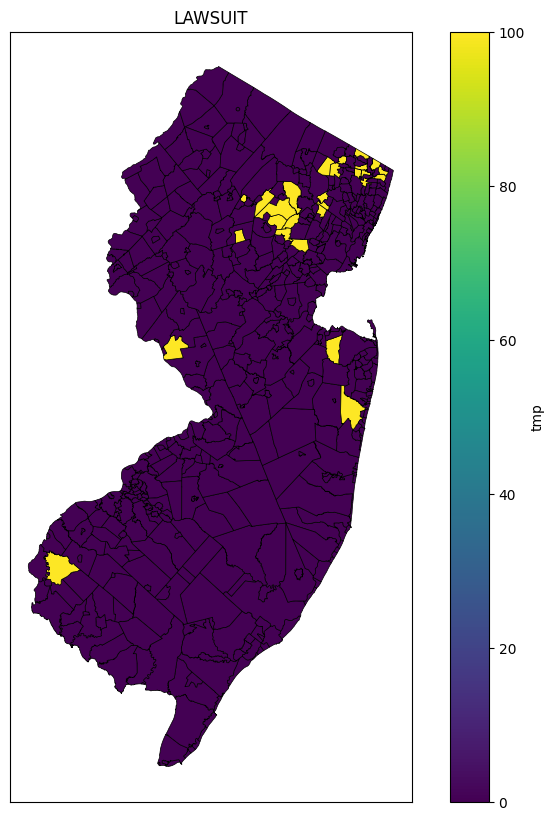

In [21]:
merged_df["tmp"] = 0
merged_df.loc[merged_df["LAWSUIT"], "tmp"] = 100
nj_gradient(merged_df, "LAWSUIT", value_col_name="tmp")

In [22]:
merged_df[(merged_df["Prospective Need with 1000/20% Cap"] == 0)]

,OBJECTID,MUN,COUNTY,MUN_LABEL,MUN_TYPE,NAME,GNIS_NAME,GNIS,SSN,MUN_CODE,...,Average Allocation Factor,Prospective Need,1000/20% Cap,Prospective Need with 1000/20% Cap,factor_1,factor_2,factor_3,LAWSUIT,value,tmp
25,590,ATLANTIC CITY,ATLANTIC,Atlantic City,City,Atlantic City,City of Atlantic City,885142,0102,0102,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
31,596,BRIDGETON CITY,CUMBERLAND,Bridgeton City,City,Bridgeton,City of Bridgeton,885169,0601,0601,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
39,604,VINELAND CITY,CUMBERLAND,Vineland City,City,Vineland,City of Vineland,885428,0614,0614,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
73,638,LINDENWOLD BORO,CAMDEN,Lindenwold Borough,Borough,Lindenwold Borough,Borough of Lindenwold,885279,0422,0422,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
86,651,TAVISTOCK BORO,CAMDEN,Tavistock Borough,Borough,Tavistock Borough,Borough of Tavistock,885416,0433,0433,...,0.61%,56,0,0,0.0008,0.0,0.0175,False,0,0
141,706,LAKEWOOD TWP,OCEAN,Lakewood Township,Township,Lakewood Township,Township of Lakewood,882076,1514,1515,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
164,729,ASBURY PARK CITY,MONMOUTH,Asbury Park City,City,Asbury Park,City of Asbury Park,885141,1303,1304,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
169,734,TRENTON CITY,MERCER,Trenton City,City,Trenton,City of Trenton,885421,1111,1111,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
185,750,LONG BRANCH CITY,MONMOUTH,Long Branch City,City,Long Branch,City of Long Branch,885285,1325,1327,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0
230,795,NEW BRUNSWICK CITY,MIDDLESEX,New Brunswick City,City,New Brunswick,City of New Brunswick,885318,1214,1213,...,0.00%,0,1000,0,0.0000,0.0,0.0000,False,0,0


### Urban Aid Municipalities

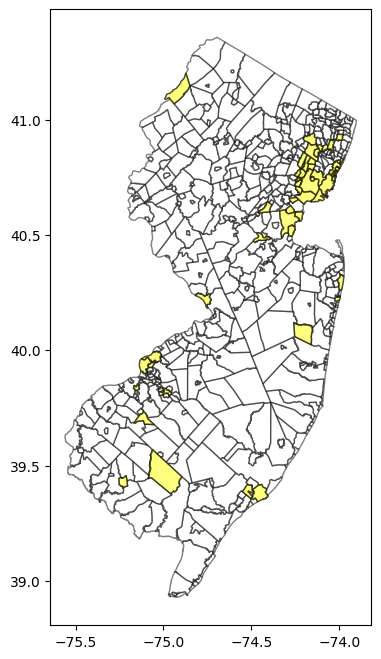

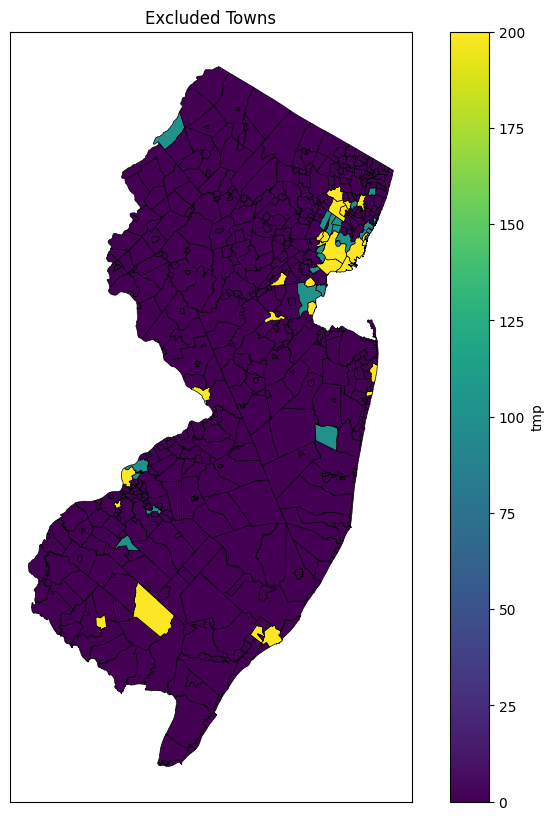

Text(0, 0.5, 'Percent')

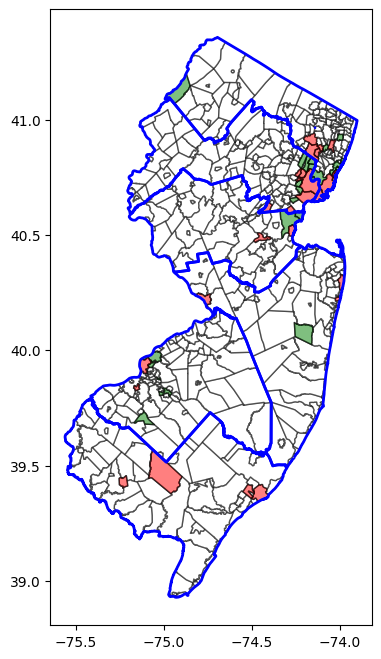

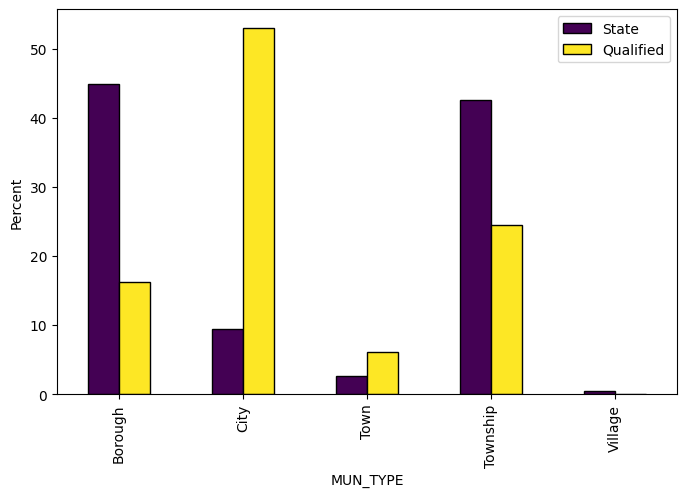

In [32]:
merged_df[merged_df["Prospective Need with 1000/20% Cap"] == 0]

merged_df["tmp"]=0
merged_df.loc[merged_df["Prospective Need with 1000/20% Cap"] == 0, "tmp"] = 100
# nj_gradient(merged_df, "Excluded Towns", value_col_name="tmp")

fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)  # Plot townships
ax = merged_df.loc[merged_df["tmp"] > 0].plot(ax=ax, color='yellow', edgecolor='black', alpha=0.5)  # Plot townships


merged_df.loc[(merged_df["Prospective Need with 1000/20% Cap"] == 0) & (merged_df["MUN_TYPE"]== "City"), "tmp"] = 200
nj_gradient(merged_df, "Excluded Towns", value_col_name="tmp")

qualified_urban_aid_towns = merged_df.loc[(merged_df["Prospective Need with 1000/20% Cap"] == 0)][["Region", "MUN", "MUN_TYPE", "COUNTY"]]

merged_df.loc[merged_df["tmp"] == 100]["MUN"]
mun_type_df = merged_df.groupby(["MUN_TYPE"])[["MUN_TYPE"]].count()
mun_type_df["State"] = mun_type_df["MUN_TYPE"]/ len(merged_df) * 100
mun_type_df.rename(columns={"MUN_TYPE": "Count"}, inplace=True)

qualified_mun_type_df = qualified_urban_aid_towns.groupby(["MUN_TYPE"])[["MUN_TYPE"]].count()
qualified_mun_type_df["Qualified"] = qualified_mun_type_df["MUN_TYPE"]/ len(qualified_urban_aid_towns) * 100
qualified_mun_type_df.rename(columns={"MUN_TYPE": "Count"}, inplace=True)
mun_type_merged_df = pd.merge(mun_type_df, qualified_mun_type_df, on="MUN_TYPE", how="outer")

fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)  # Plot townships
ax = merged_df.loc[merged_df["tmp"] == 100].plot(ax=ax, color='green', edgecolor='black', alpha=0.5)  # Plot townships
ax = merged_df.loc[merged_df["tmp"] == 200].plot(ax=ax, color='red', edgecolor='black', alpha=0.5)  # Plot townships
regions = merged_df.dissolve(by='Region')
regions.boundary.plot(ax=ax, color='blue', linewidth=2)  # Plot region boundaries


ax = mun_type_merged_df[["State", "Qualified"]].plot(kind='bar', figsize=(8, 5), colormap='viridis', edgecolor='black')
ax.set_ylabel("Percent")

In [33]:
interactive_map = nj_gradient_interactive(merged_df, "Final Prospective Need", value_col_name="Prospective Need with 1000/20% Cap")
interactive_map.save("nj_townships_map.html")  # Save to an HTML file
# interactive_map  # Display in Jupyter Notebook (if applicable)

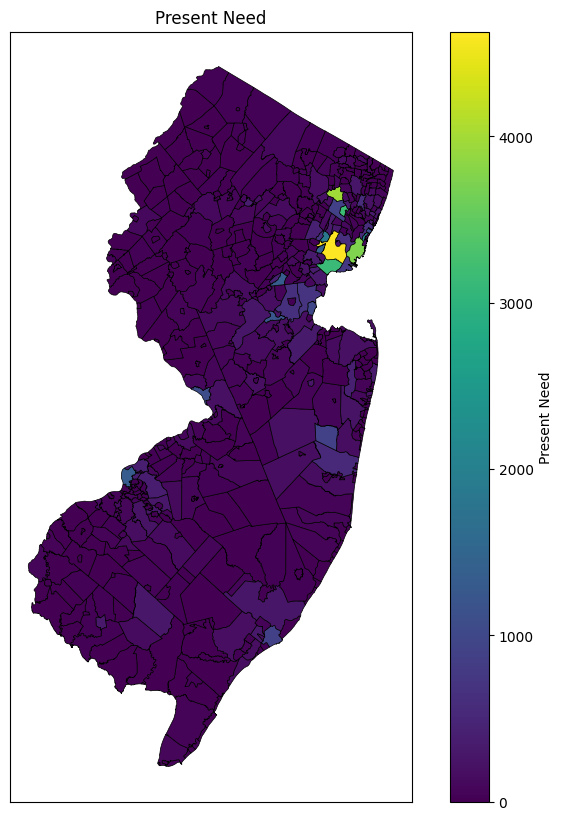

KeyError: 'households'

In [34]:
towns_with_mandate = merged_df.loc[merged_df["tmp"] == 0]
nj_gradient(merged_df, "Present Need", value_col_name="Present Need")

x = towns_with_mandate["households"]
y = towns_with_mandate["Present Need"]

slope, intercept = np.polyfit(x, y, 1)

# Generate y values for the trend line
trend_y = slope * x + intercept

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# First subplot (left)
axes[0].scatter(towns_with_mandate["households"], towns_with_mandate["Present Need"])
axes[0].plot(x, trend_y, color="red", linewidth=2, label=f"Trend Line (y={slope:.2f}x + {intercept:.2f})")
axes[0].set_xlabel("Number of Municipality Households")
axes[0].set_ylabel("Number of Mandated Present Need Houses")

# Second subplot (right)
axes[1].scatter(towns_with_mandate["mun_median_income"], towns_with_mandate["Present Need"])
axes[1].set_xlabel("Municipality Median Income")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
corr_households = np.corrcoef(towns_with_mandate["households"], towns_with_mandate["Present Need"])
no_na_median_income_towns = towns_with_mandate.loc[towns_with_mandate["mun_median_income"].notna()]
corr_median_income = np.corrcoef(no_na_median_income_towns["mun_median_income"], no_na_median_income_towns["Present Need"])
corr_households, corr_median_income

In [27]:
merged_df.columns

Index(['OBJECTID', 'MUN', 'COUNTY', 'MUN_LABEL', 'MUN_TYPE', 'NAME',
       'GNIS_NAME', 'GNIS', 'SSN', 'MUN_CODE', 'CENSUS2020', 'ACRES',
       'SQ_MILES', 'POP2020', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2020', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'geometry', 'color', 'value', 'Municipality', 'County', 'Region',
       'Present Need', 'Qualified Urban Aid Municipality',
       'Equalized Nonresidential Valuation Factor', 'Land Capacity Factor',
       'Income Capacity Factor', 'Average Allocation Factor',
       'Prospective Need', '1000/20% Cap',
       'Prospective Need with 1000/20% Cap', 'factor_1', 'factor_2',
       'factor_3', 'LAWSUIT', 'tmp'],
      dtype='object')

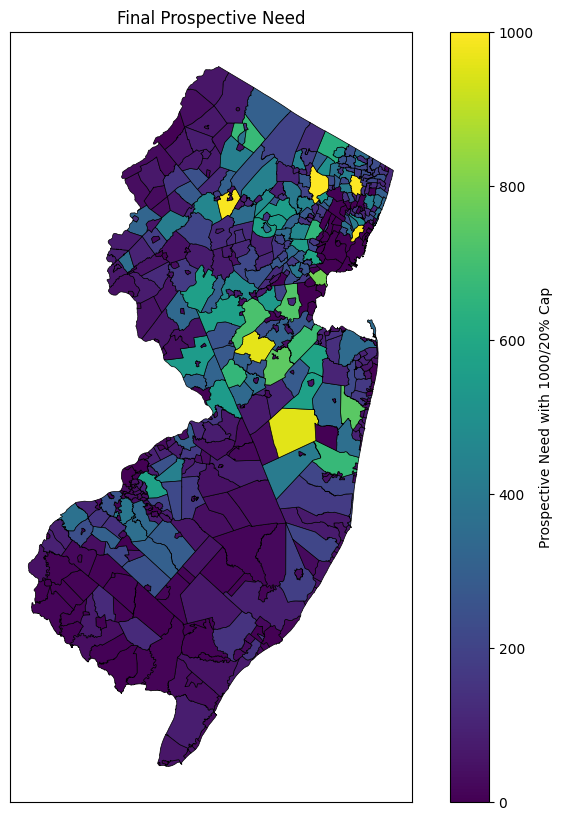

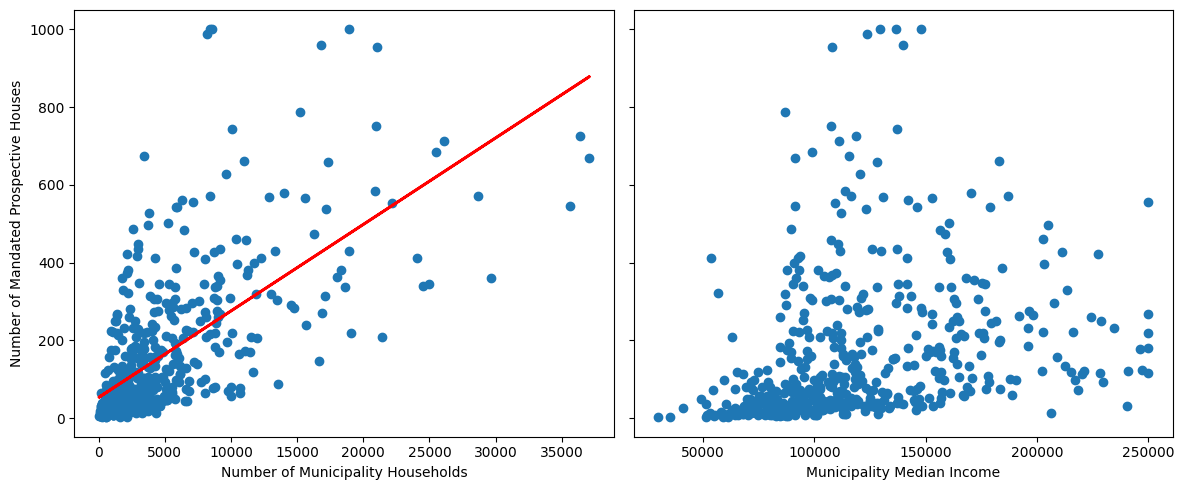

(array([[1.        , 0.67048472],
        [0.67048472, 1.        ]]),
 array([[1.        , 0.30397772],
        [0.30397772, 1.        ]]))

In [105]:
towns_with_mandate = merged_df.loc[merged_df["tmp"] == 0]
nj_gradient(merged_df, "Final Prospective Need", value_col_name="Prospective Need with 1000/20% Cap")


x = towns_with_mandate["households"]
y = towns_with_mandate["Prospective Need with 1000/20% Cap"]

slope, intercept = np.polyfit(x, y, 1)

# Generate y values for the trend line
trend_y = slope * x + intercept

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# First subplot (left)
axes[0].scatter(towns_with_mandate["households"], towns_with_mandate["Prospective Need with 1000/20% Cap"])
axes[0].plot(x, trend_y, color="red", linewidth=2, label=f"Trend Line (y={slope:.2f}x + {intercept:.2f})")
axes[0].set_xlabel("Number of Municipality Households")
axes[0].set_ylabel("Number of Mandated Prospective Houses")

# Second subplot (right)
axes[1].scatter(towns_with_mandate["mun_median_income"], towns_with_mandate["Prospective Need with 1000/20% Cap"])
axes[1].set_xlabel("Municipality Median Income")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

corr_households = np.corrcoef(towns_with_mandate["households"], towns_with_mandate["Prospective Need with 1000/20% Cap"])
no_na_median_income_towns = towns_with_mandate.loc[towns_with_mandate["mun_median_income"].notna()]
corr_median_income = np.corrcoef(no_na_median_income_towns["mun_median_income"], no_na_median_income_towns["Prospective Need with 1000/20% Cap"])
corr_households, corr_median_income

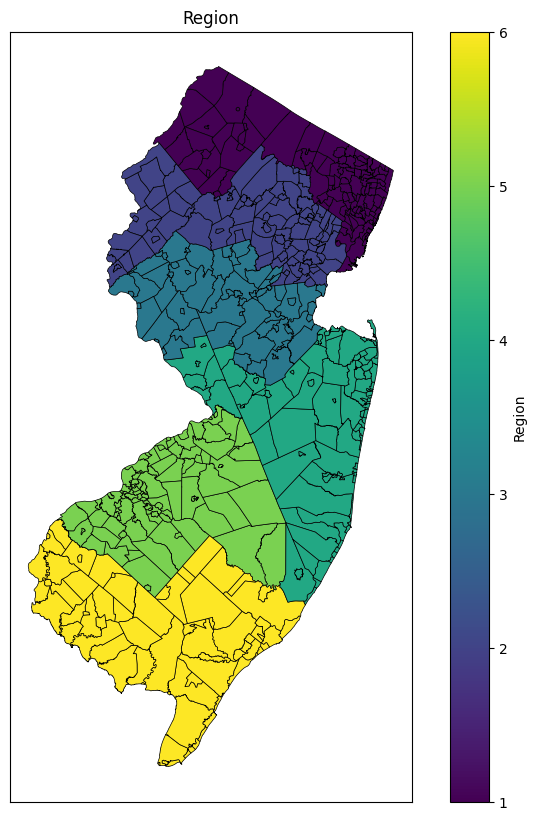

In [29]:
nj_gradient(merged_df, "Region", value_col_name="Region")

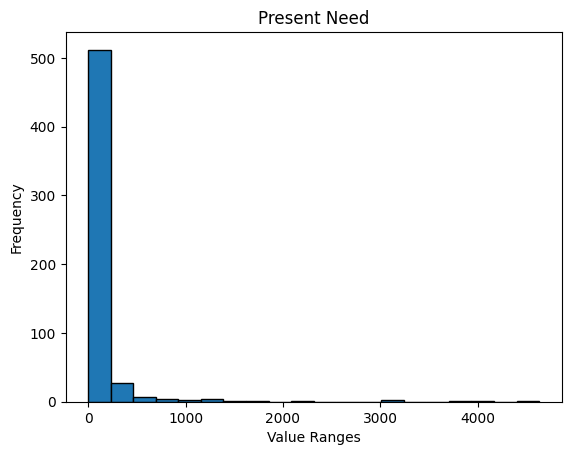

In [30]:
plt.hist(merged_df["Present Need"], bins=20, edgecolor="black")  # Adjust `bins` for grouping
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Present Need")
plt.show()

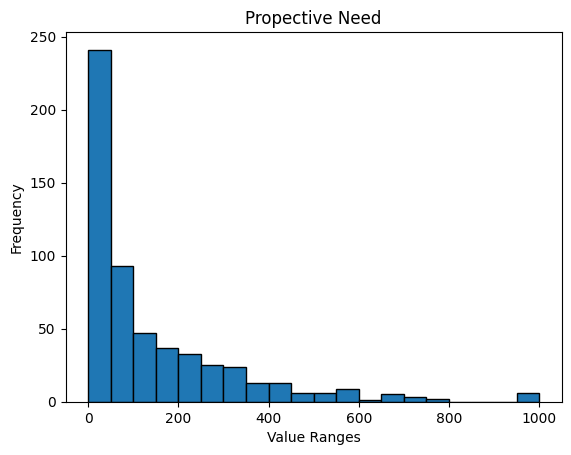

In [31]:
plt.hist(merged_df["Prospective Need with 1000/20% Cap"], bins=20, edgecolor="black")  # Adjust `bins` for grouping
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Propective Need")
plt.show()

In [32]:
county_stats = merged_df.groupby("County")[["Present Need", "Prospective Need with 1000/20% Cap"]].sum().reset_index()

In [33]:
county_stats

,County,Present Need,Prospective Need with 1000/20% Cap
0,Atlantic,1947,602
1,Bergen,4868,15984
2,Burlington,1281,3229
3,Camden,3636,2449
4,Cape May,431,561
5,Cumberland,829,395
6,Essex,9957,3768
7,Gloucester,1010,3400
8,Hudson,9608,1078
9,Hunterdon,225,2030


In [34]:
capped_towns = merged_df.loc[merged_df["Prospective Need with 1000/20% Cap"] == merged_df["1000/20% Cap"]]
capped_towns_by_county = capped_towns.groupby("County").size().reset_index(name="count")
capped_towns_by_county

,County,count
0,Bergen,9
1,Camden,1
2,Hudson,1
3,Middlesex,1
4,Monmouth,1
5,Ocean,2
6,Passaic,1
7,Somerset,1
8,Sussex,2
9,Warren,2


In [35]:
group_size = merged_df.groupby("County").size().reset_index(name="count")
group_size

,County,count
0,Atlantic,23
1,Bergen,70
2,Burlington,40
3,Camden,36
4,Cape May,16
5,Cumberland,14
6,Essex,22
7,Gloucester,24
8,Hudson,12
9,Hunterdon,26


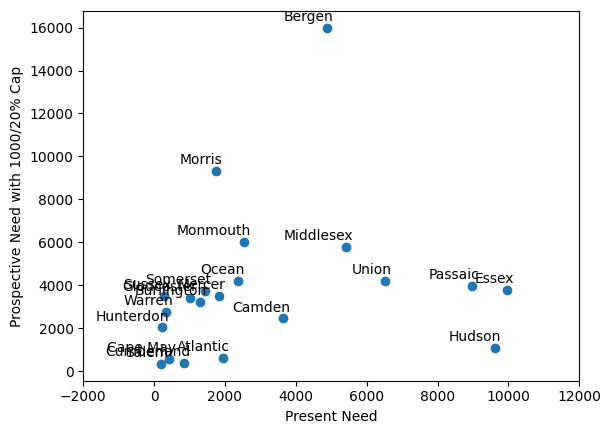

In [36]:
plt.scatter(county_stats["Present Need"], county_stats["Prospective Need with 1000/20% Cap"])
plt.xlabel("Present Need")
plt.xlim(-2000, 12000)
plt.ylabel("Prospective Need with 1000/20% Cap")
for i, row in county_stats.iterrows():
    plt.annotate(row["County"], (row["Present Need"], row["Prospective Need with 1000/20% Cap"]), textcoords="offset points", xytext=(5,5), ha="right")
    plt.tight_layout

105


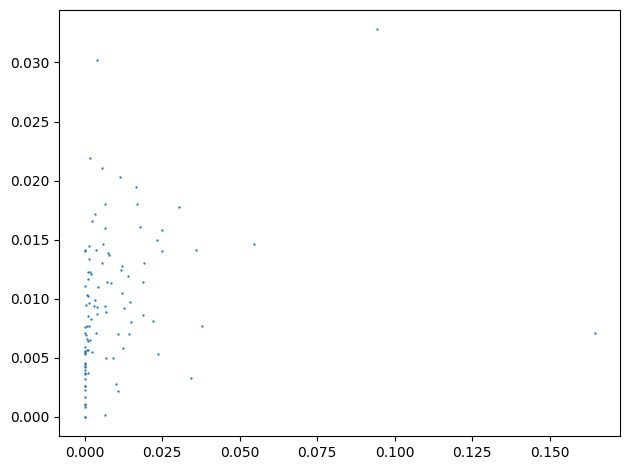

In [37]:
nj_affordable_housing_ = nj_affordable_housing.loc[(nj_affordable_housing["Qualified Urban Aid Municipality"] == "No") & (nj_affordable_housing["Region"] == 1)]
print(len(nj_affordable_housing_))
plt.scatter(nj_affordable_housing_["factor_2"], nj_affordable_housing_["factor_3"], s=0.4)
# for i, row in nj_affordable_housing.iterrows():
#     plt.annotate(row["County"], (row["factor_1"], row["factor_2"]), textcoords="offset points", xytext=(5,5), ha="right")
plt.tight_layout()


### S1903

#### Load Data

In [40]:
s1903 = pd.read_csv("../data/ACSST5Y2022.S1903-2025-03-16T195249.csv")

s1903_labels = [S1903RowLabel(i, label.lstrip(), label) for i, label in enumerate(s1903['Label (Grouping)'].to_list())]
HOUSEHOLDS_ROW = s1903_labels[1]
WHITE_ROW=s1903_labels[3]
HOUSEHOLDS_ROW, WHITE_ROW

(S1903RowLabel(index=1, short_label='Households', label='\xa0\xa0\xa0\xa0Households'),
 S1903RowLabel(index=3, short_label='White', label='\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0White'))

#### Data Model

In [39]:
@dcs.dataclass
class S1903MunEssentialData:
    household:float
    white_hh:float
    white_pct:float
    median_income: float

@dcs.dataclass
class S1903Entity:
    @abc.abstractmethod
    def _id(self):
        raise NotImplementedError()

    @abc.abstractmethod
    def number_col(self):
        raise NotImplementedError()

    @abc.abstractmethod
    def percent_col(self):
        raise NotImplementedError()
        
    @abc.abstractmethod
    def median_income_col(self):
        raise NotImplementedError()

    def extract_mun_data(self, s1903:pd.DataFrame):

        def to_float(v:str|int|float):
            if isinstance(v, str):
                if "-" == v: #Three municipali�es, Walpack Township, Teterboro Borough, and Tavistock Borough did not have 2018-22 Median Household Income es�mates available.
                    return None
                else:
                    return float(v.replace(",", "").replace("+", ""))
            elif isinstance(v, int):
                return float(v)
            else:
                return v
        try:
            mun_households = s1903.iloc[HOUSEHOLDS_ROW.index][self.number_col]       
            mun_white_households = s1903.iloc[WHITE_ROW.index][self.number_col]
            
            mun_white_percent =  s1903.iloc[WHITE_ROW.index][self.percent_col]
            
            mun_median_income_col = s1903.iloc[HOUSEHOLDS_ROW.index][self.median_income_col]
            
            return {"households": to_float(mun_households),
                    "white_households": to_float(mun_white_households),
                    "white_percent": to_float(mun_white_percent[:-1]),
                    "mun_median_income": to_float(mun_median_income_col)
                   }
        except:
            print(f"{self._id()}, {mun_households}, {mun_white_households}, {mun_white_percent}, {mun_median_income_col}")
            raise

@dcs.dataclass
class S1903MunCounty(S1903Entity):
    normalized_mun:str
    mun:str
    county:str

    def _id(self):
        return self.normalized_mun

    @property
    def number_col(self):
        return f'{self.mun}, {self.county} County, New Jersey!!Number!!Estimate'
        
    @property
    def percent_col(self):
        return f'{self.mun}, {self.county} County, New Jersey!!Percent Distribution!!Estimate'
        
    @property
    def median_income_col(self):
        return f'{self.mun}, {self.county} County, New Jersey!!Median income (dollars)!!Estimate'
        
@dcs.dataclass
class S1903RowLabel:
    index:int
    short_label:str
    label:str

### Normalize S1903 Names

In [41]:
s1903_counties = [c for c in s1903.columns.to_list() if "New Jersey!!Number!!Estimate" in c and "County" in c and "County subdivisions not defined" not in c][:21]

In [42]:
s1903_counties

['Atlantic County, New Jersey!!Number!!Estimate',
 'Bergen County, New Jersey!!Number!!Estimate',
 'Burlington County, New Jersey!!Number!!Estimate',
 'Camden County, New Jersey!!Number!!Estimate',
 'Cape May County, New Jersey!!Number!!Estimate',
 'Cumberland County, New Jersey!!Number!!Estimate',
 'Essex County, New Jersey!!Number!!Estimate',
 'Gloucester County, New Jersey!!Number!!Estimate',
 'Hudson County, New Jersey!!Number!!Estimate',
 'Hunterdon County, New Jersey!!Number!!Estimate',
 'Mercer County, New Jersey!!Number!!Estimate',
 'Middlesex County, New Jersey!!Number!!Estimate',
 'Monmouth County, New Jersey!!Number!!Estimate',
 'Morris County, New Jersey!!Number!!Estimate',
 'Ocean County, New Jersey!!Number!!Estimate',
 'Passaic County, New Jersey!!Number!!Estimate',
 'Salem County, New Jersey!!Number!!Estimate',
 'Somerset County, New Jersey!!Number!!Estimate',
 'Sussex County, New Jersey!!Number!!Estimate',
 'Union County, New Jersey!!Number!!Estimate',
 'Warren County, 

In [43]:
s1903_mun = [c for c in s1903.columns.to_list() if "New Jersey!!Number!!Estimate" in c and "County" in c and "County subdivisions not defined" not in c][21:]
[mun.split(",")[0].replace(" City city", " City") for mun in s1903_mun]

s1903_mun_parsed = []

for m in s1903_mun:
    mun, county_long, *_ = m.split(",")
    normalized_mun = mun.replace(" City city", " City")
    normalized_mun = normalized_mun.replace(" and ", "-") # Peak-Gladstone borough special case

    if normalized_mun == "South Orange Village township":
        normalized_mun = "South Orange Village twp"
        
    county = county_long.lstrip()[:-7]
    s1903_mun_parsed.append(S1903MunCounty(normalized_mun, mun, county))

assert({m.normalized_mun for m in s1903_mun_parsed} == set(nj_affordable_housing["Municipality"].to_list()))

In [ ]:
holmdel = S1903MunCounty("Holmdel township", "Holmdel township", "Monmouth")
assert {c for c in s1903.columns if "Holmdel" in c and "Error" not in c} == {holmdel.number_col, holmdel.percent_col, holmdel.median_income_col}

In [45]:
len(merged_df)

564

In [46]:
s1903_per_mun_data_df = pd.DataFrame([{"Municipality": sm.normalized_mun, "County": sm.county, **sm.extract_mun_data(s1903)} for sm in s1903_mun_parsed])
merged_df = pd.DataFrame.merge(merged_df, s1903_per_mun_data_df, on=["Municipality", "County"])

In [49]:
merged_df.loc[merged_df["LAWSUIT"]][["MUN", "COUNTY", "households", "white_percent", "mun_median_income", "Prospective Need with 1000/20% Cap"]]

,MUN,COUNTY,households,white_percent,mun_median_income,Prospective Need with 1000/20% Cap
54,MANNINGTON TWP,SALEM,442.0,81.7,100714.0,8
212,WEST AMWELL TWP,HUNTERDON,1156.0,93.8,128380.0,39
213,HOLMDEL TWP,MONMOUTH,6182.0,80.9,169242.0,133
300,MILLBURN TWP,ESSEX,7102.0,59.9,250000.0,555
346,CEDAR GROVE TWP,ESSEX,4865.0,86.0,152083.0,170
350,LITTLE FALLS TWP,PASSAIC,5654.0,80.7,119196.0,285
364,TOTOWA BORO,PASSAIC,3781.0,81.5,112097.0,528
380,ORADELL BORO,BERGEN,2733.0,79.6,196023.0,186
386,CLOSTER BORO,BERGEN,2721.0,57.1,181652.0,251
391,WESTWOOD BORO,BERGEN,4239.0,77.3,160466.0,235


In [51]:
county_stats = merged_df.groupby("County")[["Present Need", "Prospective Need with 1000/20% Cap", "households"]].sum().reset_index()
county_stats

,County,Present Need,Prospective Need with 1000/20% Cap,households
0,Atlantic,1947,602,106640.0
1,Bergen,4868,15984,350843.0
2,Burlington,1281,3229,174454.0
3,Camden,3636,2449,198757.0
4,Cape May,431,561,43277.0
5,Cumberland,829,395,52584.0
6,Essex,9957,3768,312942.0
7,Gloucester,1010,3400,109996.0
8,Hudson,9608,1078,290054.0
9,Hunterdon,225,2030,49676.0


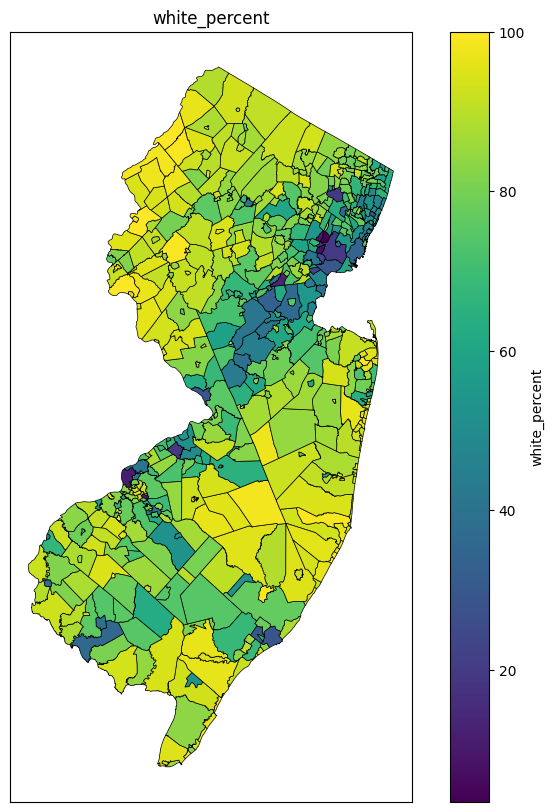

In [52]:
nj_gradient(merged_df, "white_percent", value_col_name="white_percent")

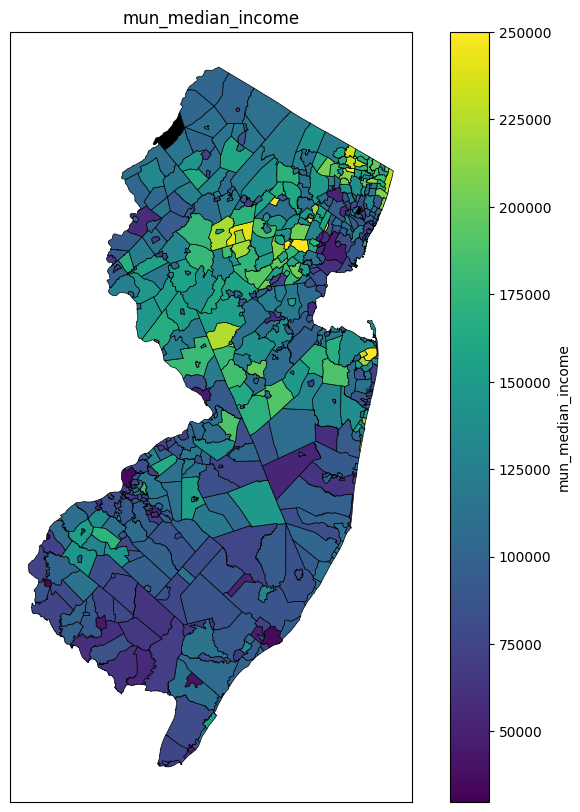

In [53]:
nj_gradient(merged_df, "mun_median_income", value_col_name="mun_median_income")

In [86]:
merged_df["white_pct_rank_in_region"] = merged_df.groupby("Region")["white_percent"].rank(ascending=False, method="dense").astype(int)
merged_df["mun_median_income_dup"]=merged_df["mun_median_income"]
merged_df["mun_median_income_dup"].fillna(0, inplace=True)
merged_df["median_income_rank_in_region"] = merged_df.groupby("Region")["mun_median_income_dup"].rank(ascending=False, method="dense").astype(int)

merged_df["MUNs_of_Region_count"] = merged_df.groupby("Region")["MUN"].transform("count")
merged_df["white_pct_rel_rank_in_region"] = merged_df["white_pct_rank_in_region"] / merged_df["MUNs_of_Region_count"]
merged_df["median_income_rel_rank_in_region"] = merged_df["median_income_rank_in_region"] / merged_df["MUNs_of_Region_count"]

/var/folders/jp/5s_9hd2d4_5gkkj4yxpty2200000gp/T/ipykernel_51105/3688625930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["mun_median_income_dup"].fillna(0, inplace=True)


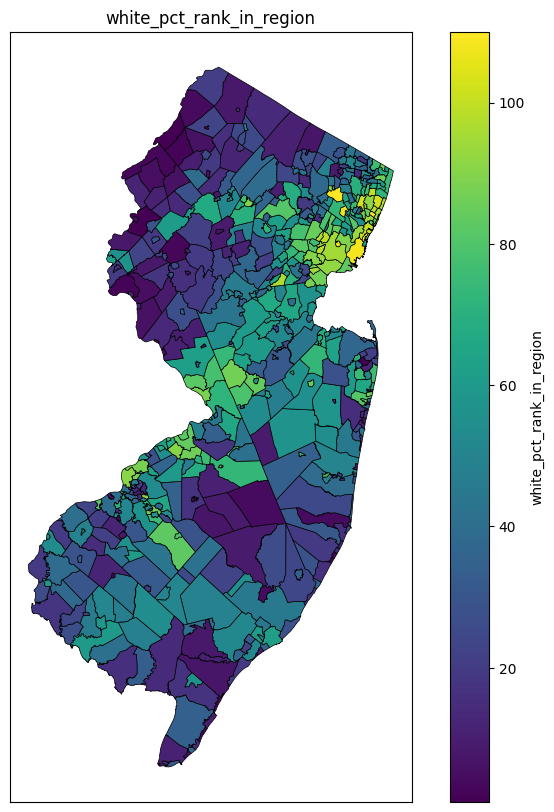

In [55]:
nj_gradient(merged_df, "white_pct_rank_in_region", value_col_name="white_pct_rank_in_region")

In [56]:
lawsuit_df = merged_df.loc[merged_df["LAWSUIT"]][["MUN", "COUNTY", "Region", "households", "white_percent", "mun_median_income", "Prospective Need with 1000/20% Cap", 
                                     "white_pct_rank_in_region", "median_income_rank_in_region", "MUNs_of_Region_count"]]
lawsuit_df

,MUN,COUNTY,Region,households,white_percent,mun_median_income,Prospective Need with 1000/20% Cap,white_pct_rank_in_region,medium_income_rank_in_region,MUNs_of_Region_count
54,MANNINGTON TWP,SALEM,6,442.0,81.7,100714.0,8,39,15,68
212,WEST AMWELL TWP,HUNTERDON,3,1156.0,93.8,128380.0,39,11,28,72
213,HOLMDEL TWP,MONMOUTH,4,6182.0,80.9,169242.0,133,64,13,98
300,MILLBURN TWP,ESSEX,2,7102.0,59.9,250000.0,555,82,1,104
346,CEDAR GROVE TWP,ESSEX,2,4865.0,86.0,152083.0,170,40,32,104
350,LITTLE FALLS TWP,PASSAIC,1,5654.0,80.7,119196.0,285,44,57,122
364,TOTOWA BORO,PASSAIC,1,3781.0,81.5,112097.0,528,40,67,122
380,ORADELL BORO,BERGEN,1,2733.0,79.6,196023.0,186,46,13,122
386,CLOSTER BORO,BERGEN,1,2721.0,57.1,181652.0,251,86,18,122
391,WESTWOOD BORO,BERGEN,1,4239.0,77.3,160466.0,235,55,29,122


In [58]:
len(merged_df["COUNTY"].unique())

21

In [78]:
lawsuit_sorted_counties = sorted(lawsuit_df["COUNTY"].unique())

array([[1.        , 0.32468545],
       [0.32468545, 1.        ]])

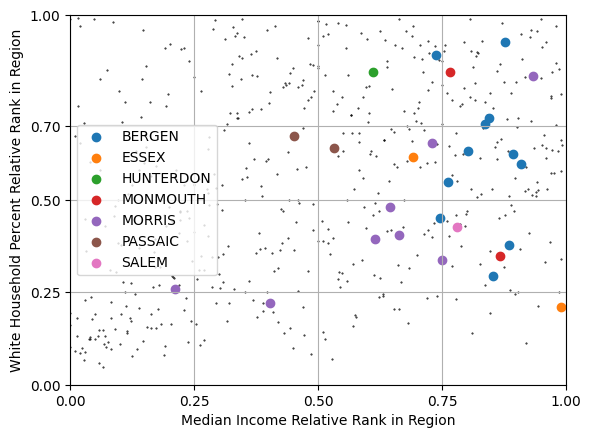

In [94]:
lawsuit_df = merged_df.loc[merged_df["LAWSUIT"]][["MUN", "COUNTY", "white_pct_rel_rank_in_region", "median_income_rel_rank_in_region"]]

plt.scatter(1- merged_df["median_income_rel_rank_in_region"], 1- merged_df["white_pct_rel_rank_in_region"], s=0.2, c='k')


for cty in lawsuit_sorted_counties:
    cty_df = lawsuit_df.loc[lawsuit_df["COUNTY"] == cty]
    plt.scatter(1 - cty_df["median_income_rel_rank_in_region"], 1 - cty_df["white_pct_rel_rank_in_region"], label=cty)

plt.xlabel("Median Income Relative Rank in Region")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="center left")  # Move legend to the upper right
plt.xticks([0, 0.25, 0.5, 0.75, 1]) 
plt.yticks([0, 0.25, 0.5, 0.7, 1]) 

plt.grid()
plt.ylabel("White Household Percent Relative Rank in Region")

correlation_matrix = np.corrcoef(1- merged_df["median_income_rel_rank_in_region"], 1- merged_df["white_pct_rel_rank_in_region"])
correlation_matrix


In [61]:
merged_df.columns
df_1 = merged_df.groupby("Region")[["ACRES", "households"]].sum().reset_index()
df_2 = merged_df.groupby("Region")[["mun_median_income"]].median().reset_index()
df_3 = merged_df.groupby('Region').agg(
    num_of_county_in_region=('COUNTY', 'nunique'),
    num_of_muni_in_region=('MUN', 'nunique')
).reset_index()

region_df = pd.merge(df_1, df_2)
region_df = pd.merge(region_df, df_3)
region_df = region_df.rename(columns={'mun_median_income': 'Region median Income'})

region_df

,Region,ACRES,households,Region Medium Income,num_of_county_in_region,num_of_muni_in_region
0,1,6.560975e+05,874454.0,116645.0,4,122
1,2,6.905981e+05,746915.0,117803.0,4,103
2,3,6.778636e+05,479209.0,119077.0,3,71
3,4,9.423513e+05,627132.0,107934.0,3,97
4,5,8.855714e+05,483207.0,91566.0,3,99
5,6,1.117246e+06,227245.0,81890.5,4,68


In [63]:
merged_df.columns

Index(['OBJECTID', 'MUN', 'COUNTY', 'MUN_LABEL', 'MUN_TYPE', 'NAME',
       'GNIS_NAME', 'GNIS', 'SSN', 'MUN_CODE', 'CENSUS2020', 'ACRES',
       'SQ_MILES', 'POP2020', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2020', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'geometry', 'color', 'value', 'Municipality', 'County', 'Region',
       'Present Need', 'Qualified Urban Aid Municipality',
       'Equalized Nonresidential Valuation Factor', 'Land Capacity Factor',
       'Income Capacity Factor', 'Average Allocation Factor',
       'Prospective Need', '1000/20% Cap',
       'Prospective Need with 1000/20% Cap', 'factor_1', 'factor_2',
       'factor_3', 'LAWSUIT', 'tmp', 'households', 'white_households',
       'white_percent', 'mun_median_income', 'white_pct_rank_in_region',
       'mun_median_income_dup', 'medium_income_rank_in_region',
       'MUNs_of_Region_count', 'white_pct_rel_rank_in_region',
       'medium_income_rel_rank_in_region'],
      dtype='

/var/folders/jp/5s_9hd2d4_5gkkj4yxpty2200000gp/T/ipykernel_51105/3122439826.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  regions['centroid'] = regions.geometry.centroid


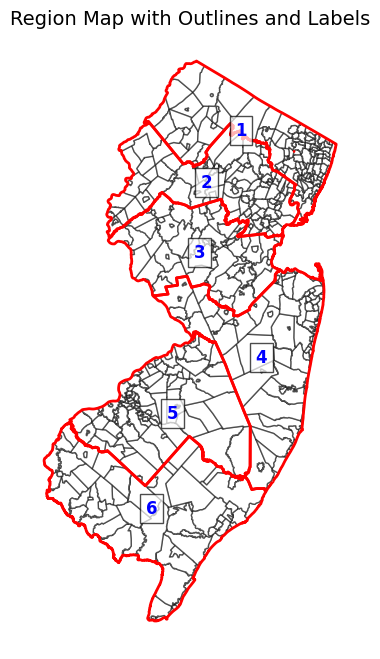

In [85]:
regions = merged_df.dissolve(by='Region')

# Compute centroids for labeling
regions['centroid'] = regions.geometry.centroid

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)  # Plot townships
regions.boundary.plot(ax=ax, color='red', linewidth=2)  # Plot region boundaries

# Add region numbers at the centroid of each region
for idx, row in regions.iterrows():
    centroid = row['centroid']
    ax.text(centroid.x, centroid.y, str(idx), fontsize=12, color='blue', 
            ha='center', va='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))

# Remove axes for a cleaner map
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("Region Map with Outlines and Labels", fontsize=14)
plt.show()